In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df = pd.read_csv("data.csv")

In [196]:
def mse(w_1):
    mse = 0
    for i in range(0,df.shape[0]):
        mse += (2+df["x"].iloc[i]*w_1 - df["y"].iloc[i])**2
    return mse/df.shape[0]

mse(1)

139.60271462000009

In [197]:
def log_likelihood(w_1):
    sigma = 4
    log_likelihood = 0
    for i in range(0,df.shape[0]):
        diff = (2 + w_1*df["x"].iloc[i]) - df["y"].iloc[i]
        log_likelihood += diff**2

    return (-1/(2 * sigma**2) * log_likelihood + 0.5*df.shape[0]*np.log(1/sigma**2) - 0.5*df.shape[0]*np.log(2*np.pi))

log_likelihood(1)

-333.3908863099783

In [198]:
import scipy.optimize as opt

xopt = opt.fmin(mse, 1.0)
xopt[0]

Optimization terminated successfully.
         Current function value: 14.069906
         Iterations: 19
         Function evaluations: 38


3.007226562500004

In [199]:
def log_likelihood_inv(w_1):
    sigma = 4
    log_likelihood = 0
    for i in range(0,df.shape[0]):
        diff = (2 + w_1*df["x"].iloc[i]) - df["y"].iloc[i]
        log_likelihood += diff**2

    return -1*(-1/(2 * sigma**2) * log_likelihood + 0.5*df.shape[0]*np.log(1/sigma**2) - 0.5*df.shape[0]*np.log(2*np.pi))

In [200]:
xopt = opt.fmin(log_likelihood_inv, 1.0)
xopt[0]

Optimization terminated successfully.
         Current function value: 137.245874
         Iterations: 19
         Function evaluations: 38


3.007226562500004

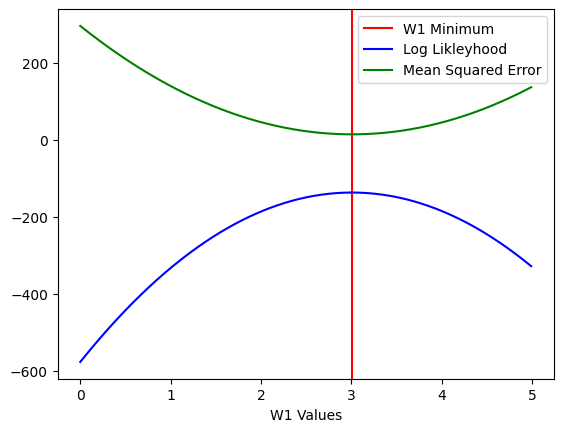

In [201]:
x = np.arange(0, 5, 0.01)

ms = np.arange(0, 5, 0.01)
for i in range(0,len(ms)):
    ms[i] = mse(ms[i])

ll = np.arange(0, 5, 0.01)
for i in range(0,len(ll)):
    ll[i] = log_likelihood(ll[i])

plt.axvline(xopt[0], color='red')
plt.plot(x, ll, color='blue')
plt.plot(x, ms, color='green')
plt.xlabel("W1 Values")
plt.legend(["W1 Minimum","Log Likleyhood","Mean Squared Error"])